In [2]:
import matplotlib.pylab as plt
import pandas as pd
import sys
import numpy as np
import sklearn
import scipy
import matplotlib
import seaborn as sns
data_root = "https://raw.githubusercontent.com/mattressdog/data/refs/heads/main/"

In [3]:
df = pd.read_csv(data_root + "Breast_Cancer_Primary.csv",
                 dtype={"Race": "string",
                        "Marital Status": "string",
                        "T Stage": "string",
                        "N Stage": "string",
                        "6th Stage": "string",
                        "differentiate": "string",
                        #"Grade": "int64",
                        "A Stage": "string",
                        #"ride_id": "string",
                        "Status": "string",})
df.columns = df.columns.str.strip()

<Axes: xlabel='Survival Months', ylabel='Count'>

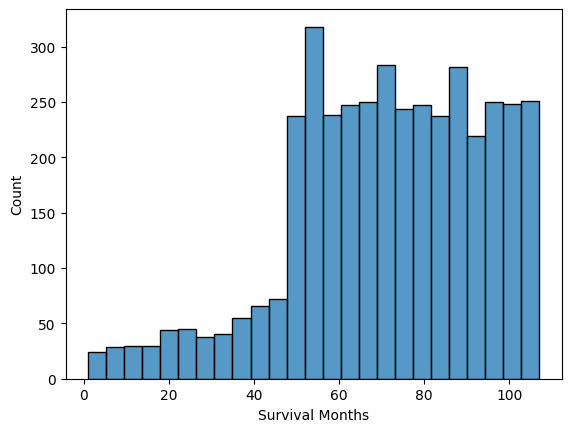

In [4]:
sns.histplot(df['Survival Months'])

In [5]:
df_sover_45 = df[df["Survival Months"] > 45]
df_sunder_45 = df[df["Survival Months"] <= 45]

<Axes: xlabel='Survival Months', ylabel='Count'>

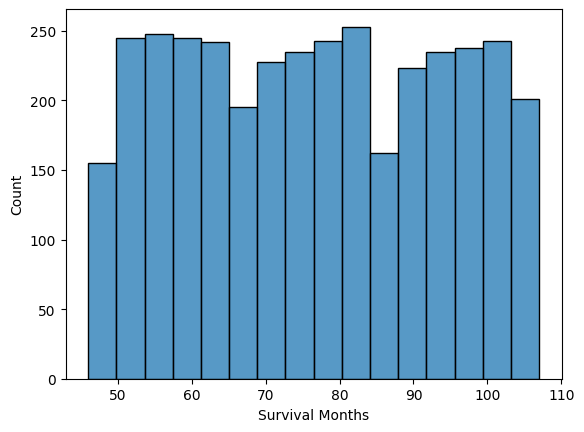

In [6]:
sns.histplot(df_sover_45["Survival Months"])

<Axes: xlabel='Survival Months', ylabel='Count'>

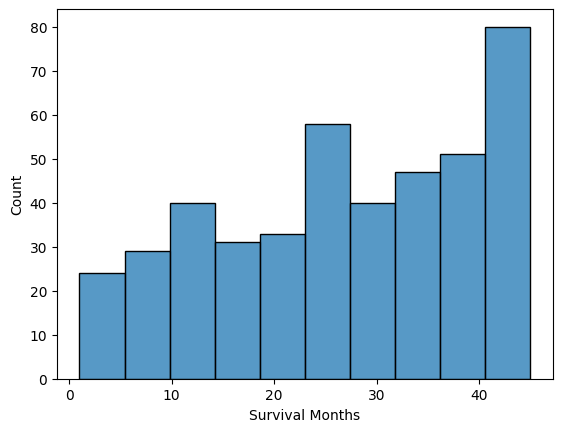

In [7]:
sns.histplot(df_sunder_45["Survival Months"])

<Axes: xlabel='Status', ylabel='count'>

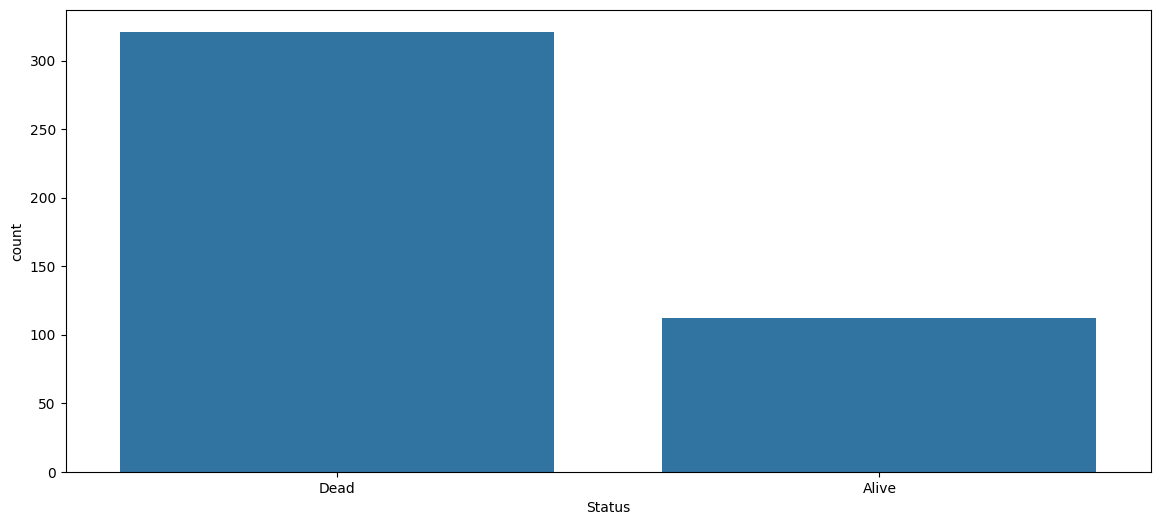

In [8]:
#sns.barplot(df_sunder_45["Status"])
#reason to believe survival months is not an indicator because patients were being added to the study as time went on rather than all at the beginning.
plt.figure(figsize=(14, 6))
sns.countplot(data=df_sunder_45, x='Status')


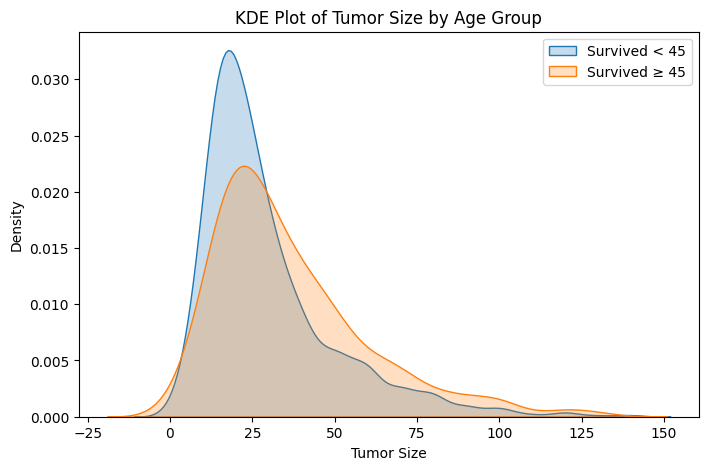

In [9]:
#Note the point where the tumor size indicates less than 50% survivability
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df_sover_45["Tumor Size"],
    label="Survived < 45",
    fill=True
)

sns.kdeplot(
    data=df_sunder_45["Tumor Size"],
    label="Survived ≥ 45",
    fill=True
)

plt.title("KDE Plot of Tumor Size by Age Group")
plt.xlabel("Tumor Size")
plt.ylabel("Density")
plt.legend()
plt.show()

In [19]:
ct = pd.crosstab(df['differentiate'], df['Status'], normalize='index')

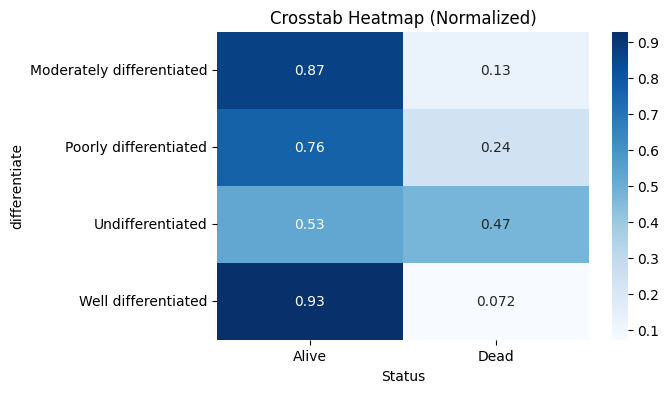

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Crosstab Heatmap (Normalized)")
#plt.ylabel("Gender")
#plt.xlabel("Purchased")
plt.show()

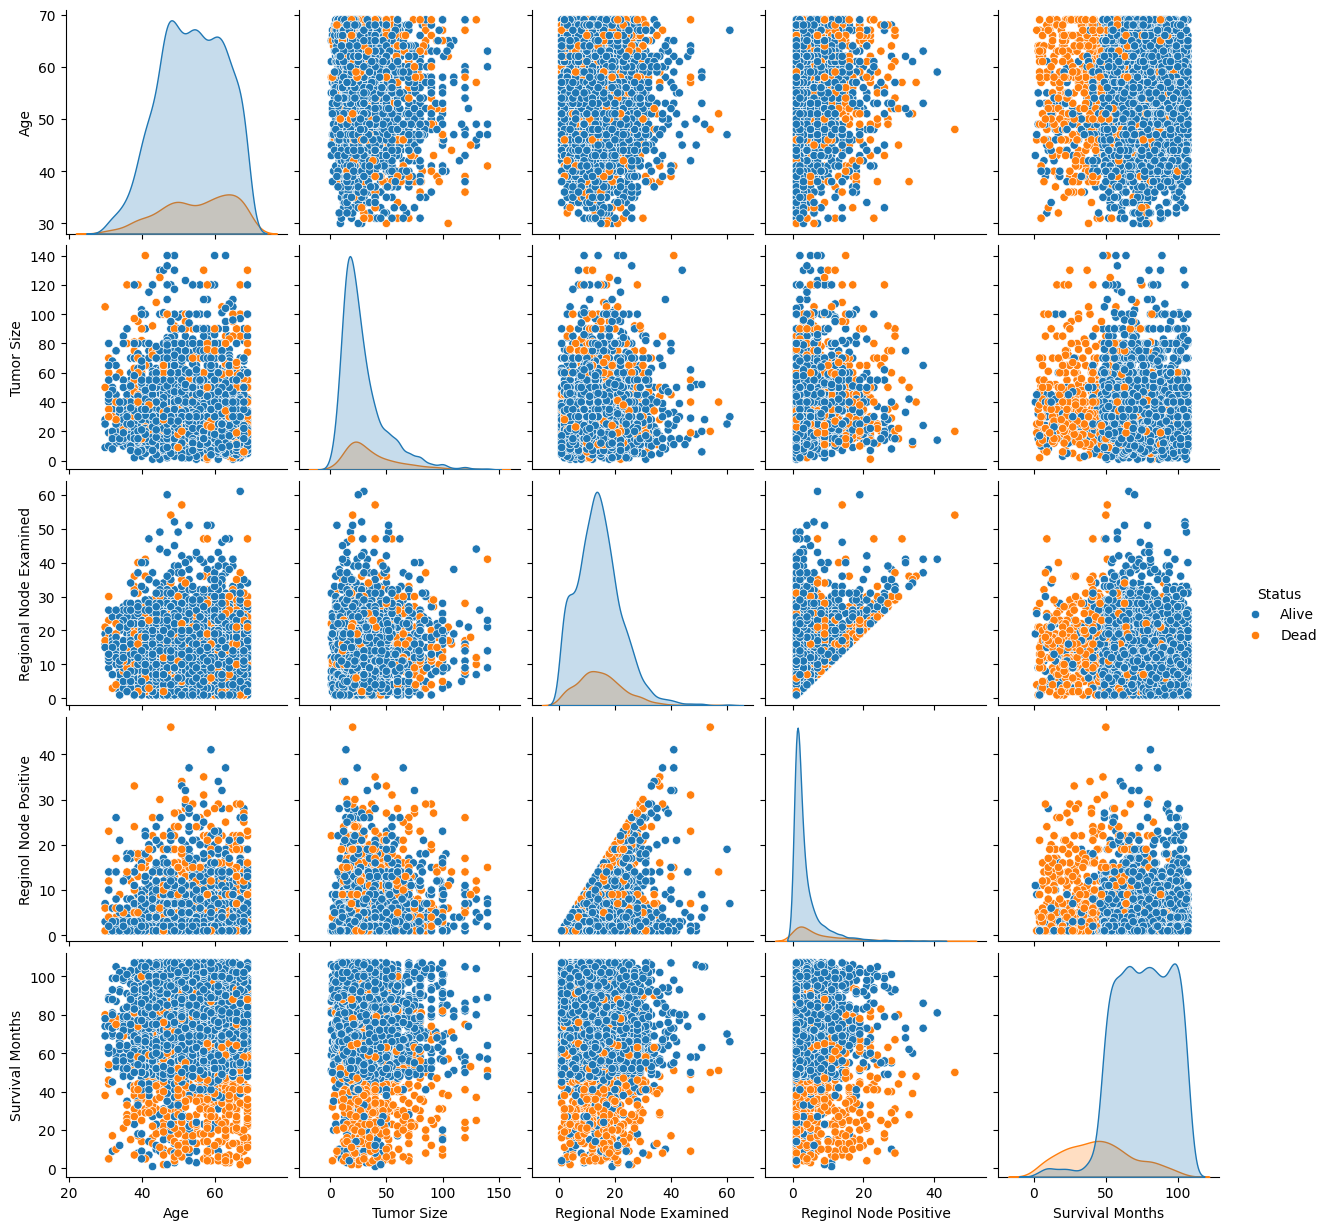

In [22]:
sns.pairplot(df, hue="Status", diag_kind="kde")

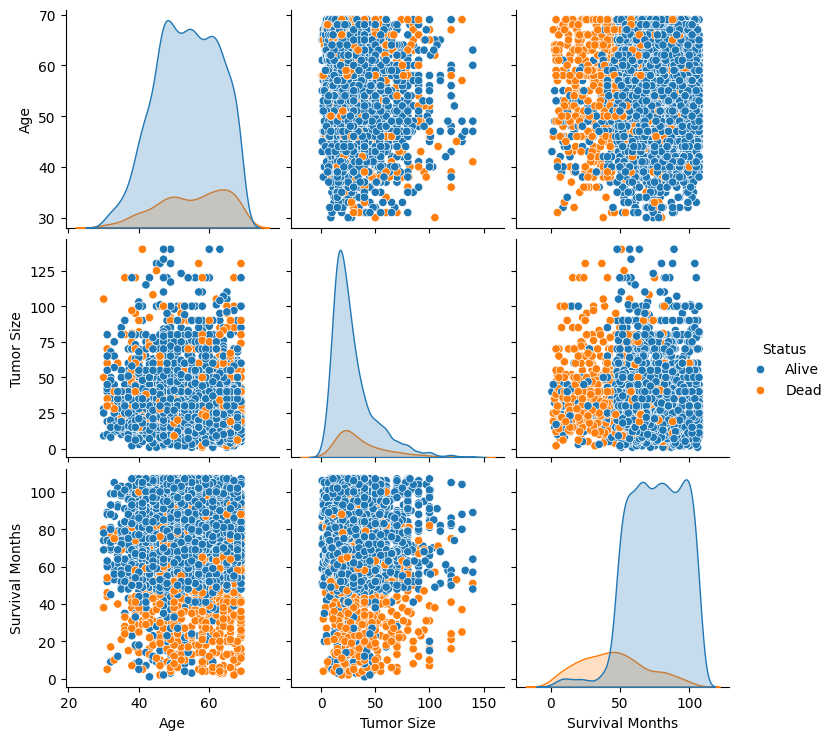

In [28]:
cols_to_plot = ['Age', 'Tumor Size', 'Survival Months']

sns.pairplot(df[cols_to_plot + ["Status"]],vars=cols_to_plot,  hue='Status', diag_kind="kde")